In [1]:
import numpy as np
import pandas as pd

In [2]:
from IPython.display import display, Math, Latex
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

from scipy import stats
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split

/tmp/ipykernel_3058528/746629651.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
def EuclideanDistance(x1, x2):
    ''' x1 and x2 are row vectors'''
    dist = np.sum((x1-x2)**2, axis=1)
    return dist

def ManhattanDistance(x1, x2):
    ''' x1 and x2 are row vectors'''
    dist = np.sum(np.abs(x1-x2), axis=1)
    return dist

In [4]:
import operator
from collections import Counter
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [EuclideanDistance(x, x_train) for x_train in self.X_train]
        k_idx = np.argsort(distances)[: self.k]
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]
        
            
        

In [23]:
import operator
from collections import Counter
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, x):
        distance_vector = EuclideanDistance(self.X_train, x)
        distance_vector_sorted_idx = np.argsort(distance_vector)
        # print(distance_vector_sorted_idx)
        nearest_k_idx = distance_vector_sorted_idx[:self.k]
        # print(nearest_k_idx)
        nearest_k_neighbours = self.y_train[nearest_k_idx]
        label = nearest_k_neighbours.mean()
        
        return label, nearest_k_idx
    
    def eval(self, X_test, y_test):
        y_predicted = np.zeros(y_test.shape)
        for i in range(y_test.shape[0]):
            y_predicted[i], _ = self.predict(X_test[i,:])
        error = y_predicted - y_test
        return error        
        
        
            
        

In [25]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_blobs(n_samples=100, 
                  n_features=2,
                  centers=[[0,0], [5, 5]],
                  random_state=12, cluster_std=1.0)

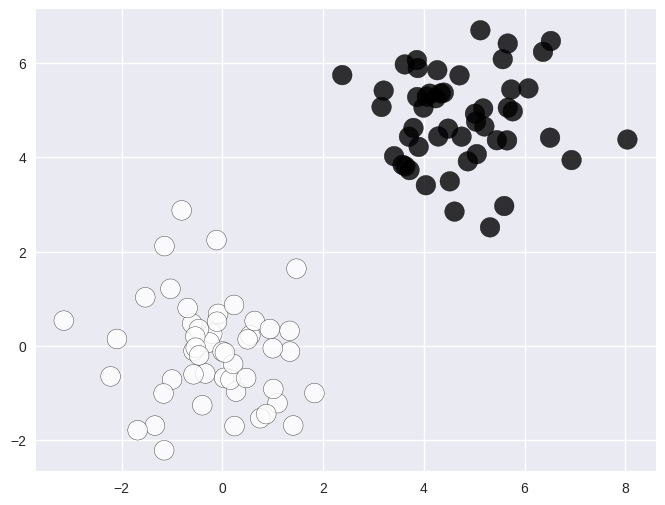

In [26]:
plt.figure(figsize=(8,6))
plt.grid(True)
plt.scatter(X[:,0], X[:, 1], marker='o', c=y, 
            s=200, edgecolor='k', alpha=0.8)
plt.show()

In [8]:
x_test = np.array([2.2, 2.2])
model = KNN(k=3)
model.fit(X, y)

In [11]:
k_nn = model.predict(x_test.reshape(1,2))
k_nn

(0.3333333333333333, array([55, 50, 74]))

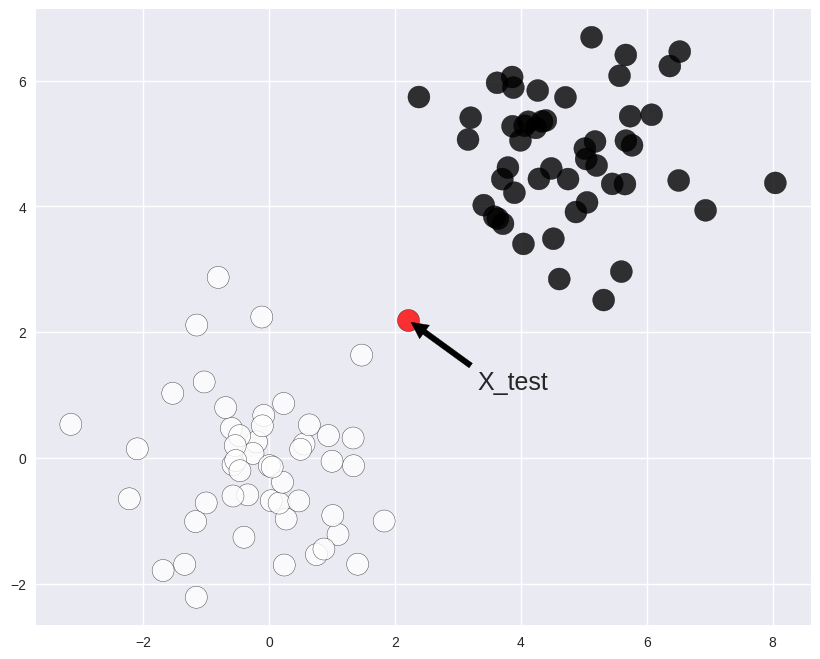

In [21]:
plt.figure(figsize=(10,8))
plt.grid(True)
plt.scatter(X[:,0], X[:, 1], marker='o', c=y, s=250, edgecolor='k', alpha=0.8)
plt.scatter(x_test[0], x_test[1], marker='o', c='red', s=250, edgecolor='k', alpha=0.8)
plt.annotate('X_test', xy=x_test, xytext=(50, -50), textcoords='offset points', 
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=18)
plt.show()

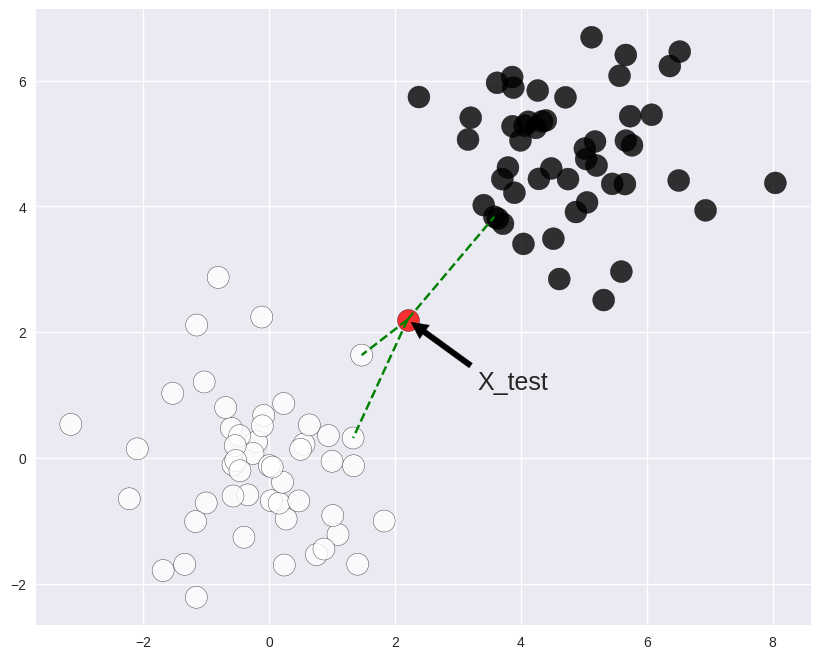

In [22]:
plt.figure(figsize=(10,8))
plt.grid(True)
plt.scatter(X[:,0], X[:, 1], marker='o', c=y, s=250, edgecolor='k', alpha=0.8)
plt.scatter(x_test[0], x_test[1], marker='o', c='red', s=250, edgecolor='k', alpha=0.8)
plt.annotate('X_test', xy=x_test, xytext=(50, -50), textcoords='offset points', 
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=18)
for xi in X[k_nn[1]]:
    plt.plot([x_test[0], xi[0]], [x_test[1], xi[1]],'g--')
plt.show()